# A Simple Linear Regression from scratch

## Objective:

The goal is to create a salary estimator based on years of experience of the employees of an anonymous company, using a simple Linear Regression Model build from scratch applied on "Salary_Data.csv" Kaggle's dataset. Then I will compare the performance of the model against the prebuilt Sklearn linear regression model.<br/>

I won't explain theory here, only background basic equations needed for code understanding.

![png](img/linear_regression.png)

---

## Table of contents

1. [Dataset]()
2. [Linear model definition]()
3. [Loss function definition]()
4. [Gradient definition]()
5. [Gradient descent algorithm]()
6. [Training model on data]()
7. [Model evaluation]()
8. [Comparison with Sklearn model]()
9. [Conclusion]()

### Importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## 1.Dataset

The dataset is constituted of “YearsExperience” and “Salary” informations for 30 employees in an anonymous company.<br/>

Get the original dataset here: https://www.kaggle.com/karthickveerakumar/salary-data-simple-linear-regression

### Importing dataset

In [2]:
df = pd.read_csv("data/Salary_Data.csv", delimiter= ',')

A simple dataframe visualization using markdown format:

In [3]:
import tabulate
print(df.head(7).to_markdown())

|    |   YearsExperience |   Salary |
|---:|------------------:|---------:|
|  0 |               1.1 |    39343 |
|  1 |               1.3 |    46205 |
|  2 |               1.5 |    37731 |
|  3 |               2   |    43525 |
|  4 |               2.2 |    39891 |
|  5 |               2.9 |    56642 |
|  6 |               3   |    60150 |


A better visualization for this blog is done by exporting dataframe visualization to png format:

In [6]:
#!pip install dataframe-image
import dataframe_image as dfi

# Export dataframe visualization as png:
dfi.export(df.head(7), "img/linear_regression_dataframe.png")

![png](img/linear_regression_dataframe.png)

### Data visualization

In [4]:
#setting plots background color
plt.rcParams.update({'axes.facecolor':'#f8fafc'})

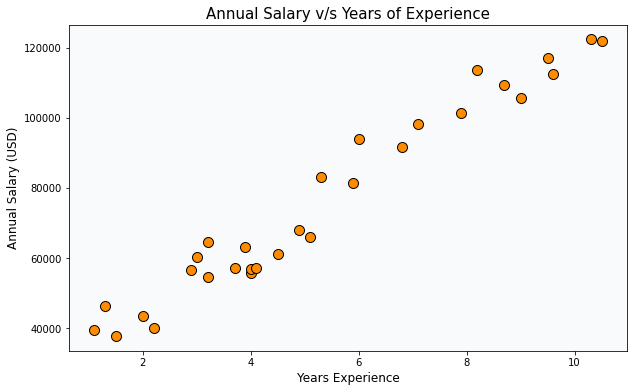

In [25]:
df.plot.scatter('YearsExperience', 'Salary',
                figsize=(10,6), color='darkorange',
                marker='o', edgecolor='k', s=100)
plt.xlabel('Years Experience', fontsize = 12)
plt.ylabel('Annual Salary (USD)', fontsize = 12)
plt.title('Annual Salary v/s Years of Experience', fontsize = 15)
plt.show()

One can see on plot that annual salaries of employees looks linearly correlated to years of experience !

## 2.Linear model definition

In statistics, linear regression is a linear approach to modelling the relationship between a scalar response and one or more explanatory variables (also known as dependent and independent variables). The case of one explanatory variable is called simple linear regression.

The model is defined by:

$ y = X.\beta + \epsilon$

$ y_i=\beta_{0} +\beta_{1}.x_i + \epsilon_i $

### Converting data into arrays

To do calculations, we need to convert our data into arrays that will feed our custom model...

In [6]:
x = df["YearsExperience"].values.reshape(-1, 1)
y = df["Salary"].values.reshape(-1, 1)
print(x.shape, y.shape)

(30, 1) (30, 1)


...And add identity column vector to feature:

$X = [1 \hspace{3mm} x_1]$

in order to do the product:

$X.\beta \hspace{3mm}where\hspace{3mm}\beta= [\beta_{0} \hspace{3mm}\beta_{1}]^T
$

In [7]:
X = np.hstack((np.ones(x.shape), x))
X[0:5]

array([[1. , 1.1],
       [1. , 1.3],
       [1. , 1.5],
       [1. , 2. ],
       [1. , 2.2]])

### Defining model

In [8]:
def model(X, Beta):
    return np.matmul(X, Beta)

### Parameters initialization

For visualization purpose, I added a constant value to Beta initial values.

In [9]:
Beta = np.random.randn(2, 1) + 10000
print(Beta)

[[ 9999.08003984]
 [10000.77605995]]


### Checking model's initial state

In [10]:
y_init = model(X, Beta)

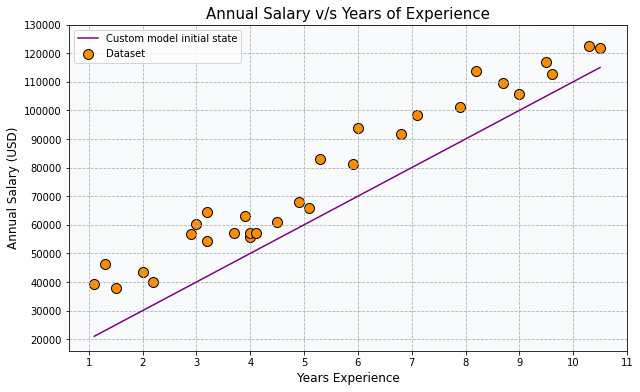

In [24]:
plt.figure(figsize=(10,6))

plt.plot(x, y_init, label='Custom model initial state',
         c= 'purple', marker='None', linestyle= 'solid')
plt.scatter(x, y, c= 'darkorange', label='Dataset', marker='o', edgecolor='k', s=100)
plt.legend(facecolor='white')
plt.title('Annual Salary v/s Years of Experience', fontsize = 15)
plt.xlabel('Years Experience', fontsize = 12)
plt.ylabel('Annual Salary (USD)', fontsize = 12)
plt.xticks(np.arange(1, 12, 1))
plt.yticks(np.arange(20000, 140000, 10000))
plt.grid(linestyle='--')

plt.show()

One clearly see that the model is not yet fitted to our data.

## 3.Loss function definition using Mean Squared Error (MSE)

$ J(\beta) = \frac{1}{2m} \sum (X.\beta - y)^2 $

In [12]:
def lossFunction(X, y, Beta):
        m = y.shape[0] # where m is the number of samples
        return 1/(2*m) * np.sum(np.square(model(X, Beta) - y))

Let's check the initial loss value.

In [13]:
lossFunction(X, y, Beta)

99589404.65543446

## 4.Gradient definition

$\frac{\partial J(\beta) }{\partial \beta} = \frac{1}{m} X^T.(X.\beta - y)$

In [14]:
def gradient(X, y, Beta):
    m = y.shape[0]
    return 1/m * np.matmul(X.T, model(X, Beta) - y)

## 5.Gradient descent algorithm

$\beta' = \beta - \alpha \frac{\partial J(\beta) }{\partial \beta}$

In [15]:
def gradientDescent(X, y, Beta, learning_rate, n_iterations):
    loss_history = np.zeros(n_iterations)
    for iter in range(n_iterations):
        Beta = Beta - learning_rate * gradient(X, y, Beta)
        loss_history[iter] = lossFunction(X, y, Beta)
    
    return Beta, loss_history

## 6.Training model on data

Fisrt I define the hypermarameters:

In [16]:
N_ITERATIONS = 20000
LEARNING_RATE = 0.001

Then I train the model on the data...

In [17]:
Final_Beta, loss_history = gradientDescent(X, y, Beta, LEARNING_RATE, N_ITERATIONS)

...so I can get the regression coefficients.

In [18]:
print(f"Intercept = {Final_Beta[0][0]:.2f}")
print(f"coefficient = {Final_Beta[1][0]:.2f}")

Intercept = 25566.37
coefficient = 9483.47


Let's have a look on the Learning Curve:

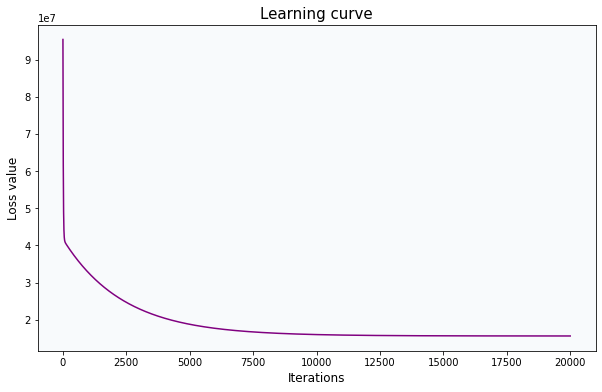

In [23]:
plt.figure(figsize=(10,6))
plt.plot(range(N_ITERATIONS), loss_history, c= 'purple')
plt.title('Learning curve', fontsize = 15)
plt.xlabel('Iterations', fontsize = 12)
plt.ylabel('Loss value', fontsize = 12)
plt.show()

## 7.Model evaluation

### Regression line visualization

In [20]:
y_pred_custom = model(X, Final_Beta)

Let's have a look on the regression line:

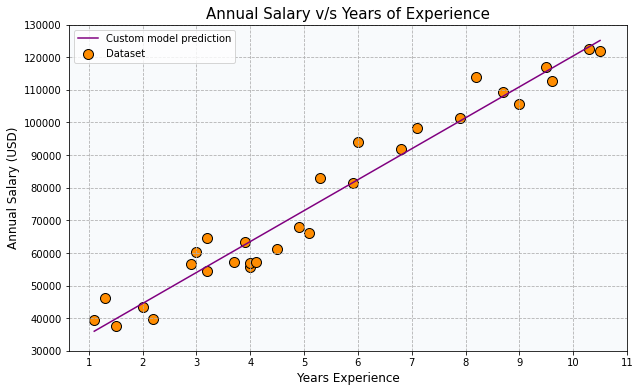

In [22]:
plt.figure(figsize=(10,6))

plt.plot(x, y_pred_custom, label='Custom model prediction',
         c= 'purple', marker='None', linestyle= 'solid')
plt.scatter(x, y, c= 'darkorange', label='Dataset', marker='o', edgecolor='k', s=100)
plt.legend(facecolor='white', loc="upper left")
plt.title('Annual Salary v/s Years of Experience', fontsize = 15)
plt.xlabel('Years Experience', fontsize = 12)
plt.ylabel('Annual Salary (USD)', fontsize = 12)
plt.xticks(np.arange(1, 12, 1))
plt.yticks(np.arange(30000, 140000, 10000))
plt.grid(linestyle='--')

plt.show()

We can see on plot that this time the model fits pretty good on the data !

### Salary estimation

Now let's imagine that we want to have an estimation of the salary for someone who have 12 years of experience in the company.

In [28]:
x_estimation = np.array([12])
X_estimation = np.hstack((np.ones(x_estimation.shape), x_estimation))
y_estimation = model(X_estimation, Final_Beta)

print(f'The estimated annual salary of someone who has 12 years of experience is \
{y_estimation[0]:.0f} USD \n... according to our dataset.')

The estimated annual salary of someone who has 12 years of experience is 139368 USD 
... according to our dataset.


Let's visualize the result on the plot:

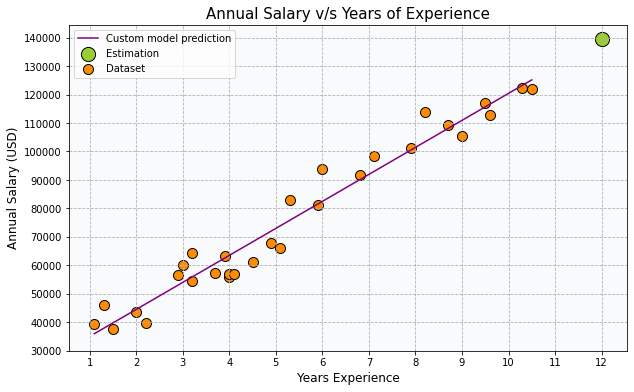

In [30]:
plt.figure(figsize=(10,6))

plt.scatter(x_estimation, y_estimation, label='Estimation',
            c= 'yellowgreen', marker='o', edgecolor='k', s=200)
plt.plot(x, y_pred_custom, label='Custom model prediction',
         c= 'purple', marker='None', linestyle= 'solid')
plt.scatter(x, y, c= 'darkorange', label='Dataset', marker='o', edgecolor='k', s=100)
plt.legend(facecolor='white', loc="upper left")
plt.title('Annual Salary v/s Years of Experience', fontsize = 15)
plt.xlabel('Years Experience', fontsize = 12)
plt.ylabel('Annual Salary (USD)', fontsize = 12)
plt.xticks(np.arange(1, 13, 1))
plt.yticks(np.arange(30000, 150000, 10000))
plt.grid(linestyle='--')

plt.show()

One can see on plot the estimated salary for someone who has 12 years of experience in the company.

### Coefficient of determination

This coefficient indicates the quality of predictions made with our model.

$ R^2 = 1 - \frac{\sum ((y^i - f(x^i))^2}{\sum ((y^i - \bar y)^2)} $

In [31]:
def determinationCoef(y, y_pred):
    u = ((y - y_pred)**2).sum()      # Residual sum of squares SSR
    v = ((y - y.mean())**2).sum()    # Total sum of squares SST
    return np.sqrt(1 - u/v)

In [32]:
print(f"R2 = {determinationCoef(y, y_pred_custom):0.2f}")

R2 = 0.98


We almost reach the maximum value of 1 !! The model can estimate accuratly any salary given the number of years of experience of an employee in the company.

## 8.Comparison with sklearn LinearRegression model

Scikit-Learn already provides a well built Linear Regression model for general purpose (linear, multi-linear or polynomial regressions). <br/>
I will apply it on the Salary_data.csv dataset in order to compare and check the quality of my custom linear regression model.

As I've done previously, I define X,y variables

In [33]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values.reshape(-1, 1)
print(X.shape, y.shape)

(30, 1) (30, 1)


Next I define a linear regression model using Sklearn library...

In [34]:
from sklearn.linear_model import LinearRegression
LR_model = LinearRegression()

...fit the model to the data...

In [35]:
LR_model.fit(X, y)

LinearRegression()

...and get the resulting regression coefficients

In [36]:
print(f"Intercept = {LR_model.intercept_[0]:.2f}")
print(f"coefficient = {LR_model.coef_[0][0]:.2f}")

Intercept = 25792.20
coefficient = 9449.96


Now let's see how well the model fits to the data

In [37]:
y_pred_sklearn = LR_model.predict(X)

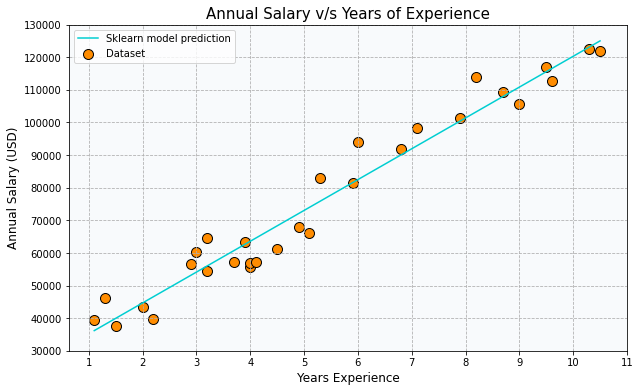

In [38]:
plt.figure(figsize=(10,6))

plt.plot(X, y_pred_sklearn, label='Sklearn model prediction',
         c= 'darkturquoise', marker='None', linestyle= 'solid')
plt.scatter(X, y, c= 'darkorange', label='Dataset', marker='o', edgecolor='k', s=100)
plt.legend(facecolor='white', loc="upper left")
plt.title('Annual Salary v/s Years of Experience', fontsize = 15)
plt.xlabel('Years Experience', fontsize = 12)
plt.ylabel('Annual Salary (USD)', fontsize = 12)
plt.xticks(np.arange(1, 12, 1))
plt.yticks(np.arange(30000, 140000, 10000))
plt.grid(linestyle='--')

plt.show()

Salary estimation:

In [39]:
X_estimation = np.array([12]).reshape(-1,1)
y_estimation = LR_model.predict(X_estimation)

print(f'The estimated annual salary of someone who has 12 years of experience is \
{y_estimation[0][0]:.0f} USD')

The estimated annual salary of someone who has 12 years of experience is 139192 USD


## 9.Conclusion

**The custom model build from scratch looks pretty good to predict salary given years of experience and fits pretty well to the data, thus I get a R2 determination coefficient of 0.98 (almost 1) that indicates a good quality of predictions.**

**Comparing coefficients of regression and estimated salaries for both models, one can see that the custom model is pretty close to the Sklearn model.**

In [47]:
import tabulate
import pandas as pd
results = {
    'Model': ["Custom LR model", 'Sklearn LR model'],
    'Intercetp': [25566.40, 25792.20],
    'coefficient': [9483.47, 9449.96],
    '12 Years exp. estimated Ann. Salary': [139368, 139192]}

df_results = pd.DataFrame(data=results).set_index('Model')
print(df_results.to_markdown())

| Model            |   Intercetp |   coefficient |   12 Years exp. estimated Ann. Salary |
|:-----------------|------------:|--------------:|--------------------------------------:|
| Custom LR model  |     25566.4 |       9483.47 |                                139368 |
| Sklearn LR model |     25792.2 |       9449.96 |                                139192 |


**Now we have a rather precise tool which can help human resources to estimate the annual salary of an employee of this anonymous company according to his number of experience in this company.**